In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style='darkgrid')
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [2]:
# try to parse the dates right at the beginning
# it works out of the box if the data was stored ISO YYYY-MM-DD format

df_analyse = pd.read_csv('../data/processed/COVID_small_flat_table.csv', sep=';')
df_analyse.sort_values('date', ascending = True).head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [3]:
N0 = pow(10, 6)
beta = 0.4
gamma = 0.1

I0 = df_analyse.Germany[35]
S0 = N0 - I0
R0 = 0

1000000

In [4]:
def SIR_model(SIR, beta, gamma):
    ''' Simple SIR_model
        S: susceptible population
        I: infected people
        R: recovered people
        beta:
        
        overall condition is that the sum of changes (differences) sum up to 0
        dS + dI + dR = 0
        S + I + R = N (constant size of population)
    '''
    
    S, I, R = SIR
    dS_dt = -beta * S * I/N0
    dI_dt = beta * S * I/N0 - gamma*I
    dR_dt = gamma * I
    return([dS_dt, dI_dt, dR_dt])

In [5]:
SIR = np.array([S0, I0, R0])
propagation_rates = pd.DataFrame(columns={'susceptible': S0,
                                         'infected': I0,
                                         'recovered':R0})

for each in np.arange(100):
    
    new_delta_vec = SIR_model(SIR, beta, gamma)
    
    SIR = SIR + new_delta_vec
    
    propagation_rates = propagation_rates.append({'susceptible': SIR[0],
                                         'infected': SIR[1],
                                         'recovered':SIR[2]}, ignore_index = True)


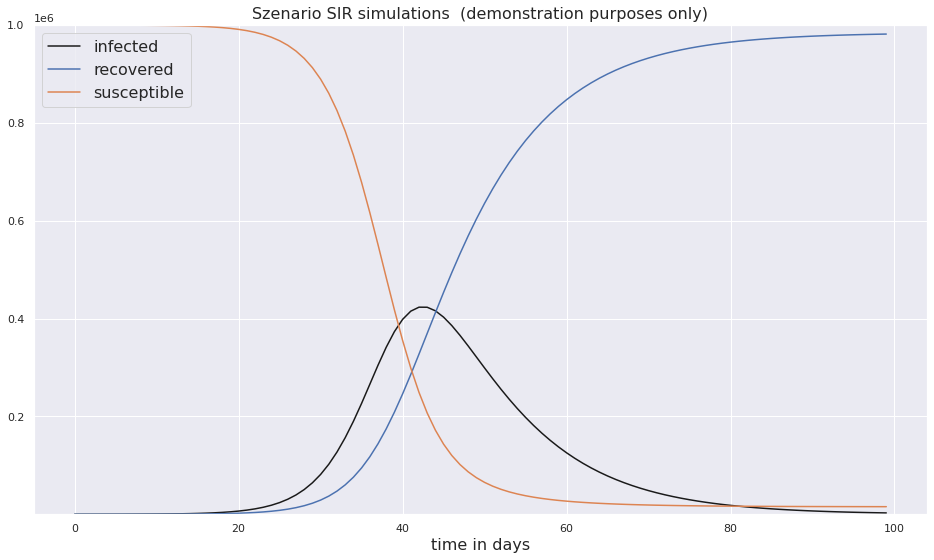

In [6]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Fitting the parameters of SIR model

In [7]:
from scipy import optimize
from scipy import integrate

ydata = np.array(df_analyse.Germany[35:])
t=np.arange(len(ydata))

In [8]:
I0 = ydata[0]
S0 = pow(10, 6)
R0 = 0
beta

0.4

In [9]:
def SIR_model_t(SIR, t, beta, gamma):
    ''' Simple SIR_model
        S: susceptible population
        I: infected people
        R: recovered people
        beta:
        
        overall condition is that the sum of changes (differences) sum up to 0
        dS + dI + dR = 0
        S + I + R = N (constant size of population)
    '''
    
    S, I, R = SIR
    dS_dt = -beta * S * I/N0
    dI_dt = beta * S * I/N0 - gamma*I
    dR_dt = gamma * I
    return([dS_dt, dI_dt, dR_dt])

In [10]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [11]:
propt=[0.4, 0.1]
fit_odeint(t, *propt)


array([2.70000000e+01, 3.64461007e+01, 4.91966833e+01, 6.64075008e+01,
       8.96383381e+01, 1.20994097e+02, 1.63315009e+02, 2.20432987e+02,
       2.97516902e+02, 4.01537287e+02, 5.41891102e+02, 7.31240521e+02,
       9.86636858e+02, 1.33102263e+03, 1.79523180e+03, 2.42064024e+03,
       3.26265435e+03, 4.39525934e+03, 5.91687126e+03, 7.95772492e+03,
       1.06889443e+04, 1.43332139e+04, 1.91764874e+04, 2.55792697e+04,
       3.39844923e+04, 4.49167073e+04, 5.89643268e+04, 7.67336852e+04,
       9.87628191e+04, 1.25387758e+05, 1.56569369e+05, 1.91715994e+05,
       2.29568180e+05, 2.68224802e+05, 3.05358881e+05, 3.38593262e+05,
       3.65921266e+05, 3.86026901e+05, 3.98409242e+05, 4.03309039e+05,
       4.01508711e+05, 3.94096301e+05, 3.82260196e+05, 3.67144307e+05,
       3.49764662e+05, 3.30974003e+05, 3.11457875e+05, 2.91748230e+05,
       2.72244800e+05, 2.53238254e+05, 2.34931993e+05, 2.17461167e+05,
       2.00908526e+05, 1.85317256e+05, 1.70701154e+05, 1.57052578e+05,
      

In [13]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])



<ipython-input-9-68a4b8c16084>:14: RuntimeWarning: overflow encountered in double_scalars
  dS_dt = -beta * S * I/N0
<ipython-input-9-68a4b8c16084>:15: RuntimeWarning: overflow encountered in double_scalars
  dI_dt = beta * S * I/N0 - gamma*I
/home/nick/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [0.00261664 0.00240585]  start infect: 27
Optimal parameters: beta = 0.1387183962204556  and gamma =  0.04899888902519855


In [19]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)


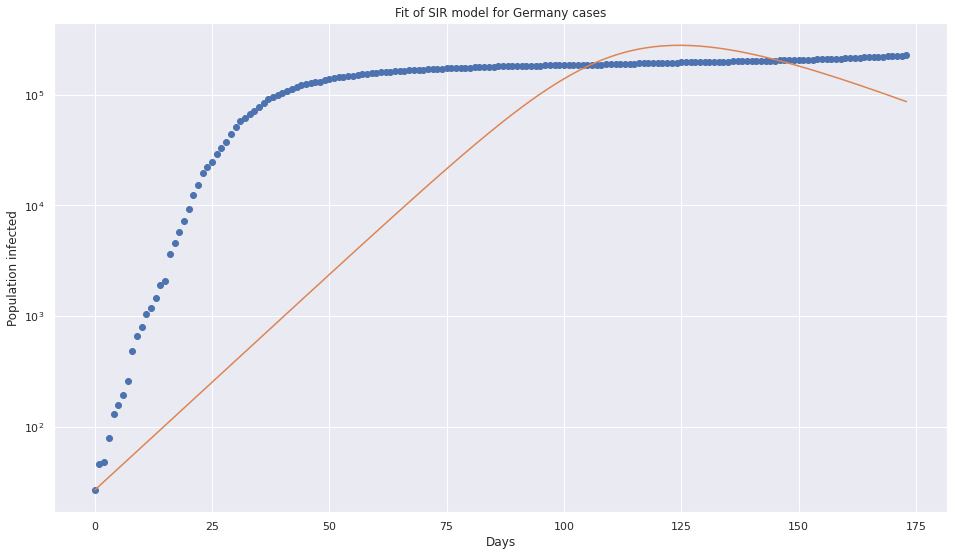

Optimal parameters: beta = 0.1387183962204556  and gamma =  0.04899888902519855
Basic Reproduction Number R0  2.831051866280421
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [20]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

# Dynamic beta in SIR (infection rate)

In [16]:
t_initial = 28
t_intro_measures = 14
t_hold = 21
t_relax = 21

beta_max = 0.4
beta_min = 0.11
gamme = 0.1

pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max, beta_min, t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min, beta_max, t_relax),
                       ))

pd_beta

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.37769231,
       0.35538462, 0.33307692, 0.31076923, 0.28846154, 0.26615385,
       0.24384615, 0.22153846, 0.19923077, 0.17692308, 0.15461538,
       0.13230769, 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.1245    ,
       0.139     , 0.1535    , 0.168     , 0.1825    , 0.197     ,
       0.2115    , 0.226     , 0.2405    , 0.255     , 0.2695 

In [17]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

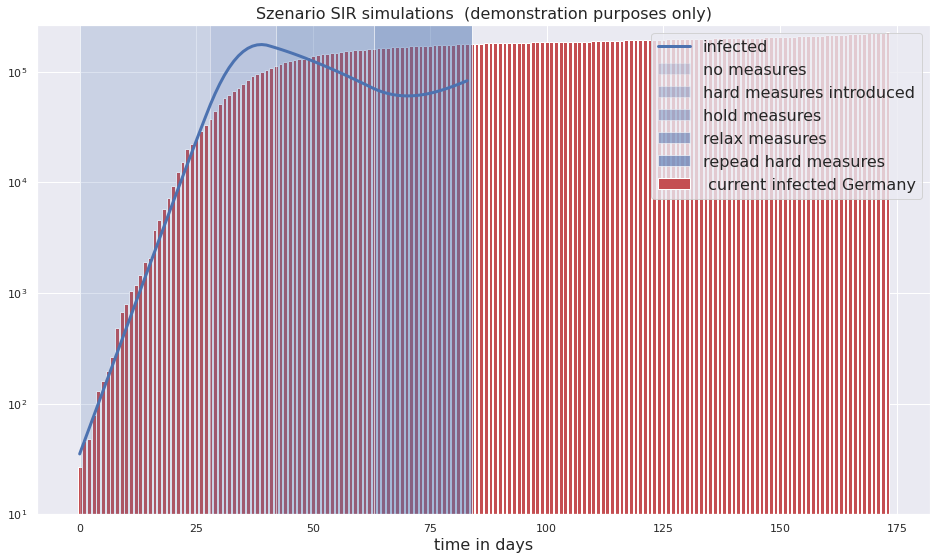

In [18]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata)),ydata, width=0.8,label=' current infected Germany',color='r')

ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 1.5*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});